### 使用CART决策树进行MNIST手写数字分类

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt

加载数据

In [4]:
digits = load_digits()
data = digits.data

查看数据

In [6]:
data.shape

(1797, 64)

In [7]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [8]:
digits.target[0]

0

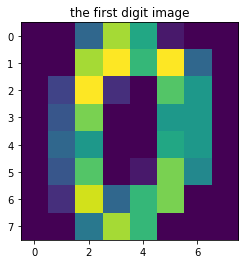

In [9]:
plt.title('the first digit image')
plt.imshow(digits.images[0])

分割数据，将20%的数据作为测试集，其余作为训练集

In [10]:
train_X, test_X, train_Y, test_Y = train_test_split(data, digits.target, test_size = 0.2, random_state = 10)

In [11]:
?train_test_split

采用Z-Score规范化

In [13]:
ss = preprocessing.StandardScaler()
train_ss_x = ss.fit_transform(train_X)
test_ss_x = ss.transform(test_X)

创建CART决策树

In [14]:
md = DecisionTreeClassifier()

In [15]:
md.fit(train_ss_x, train_Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [16]:
predict_Y = md.predict(test_ss_x)

In [19]:
score = accuracy_score(predict_Y, test_Y)
print("CART的准确率:{:.4f}".format(score))

CART的准确率:0.8711
